# Deep Leanring for Time Series Forescasting

One of the main methods to forecast in time Series is the use of Auto-Regressive models (AR), that expresses the time series at time $t$ as a linear regression of previous $p$ observations.

$$
x_t = w_0 + \sum_{i=1}^p w_i x_{t-i} + \epsilon_t
$$
where $\epsilon_t$ corresponds to the residual error term from the AR models

The underlying idea that linear model can be generalized for the objective of time series forescasting of to determine a function $f$ that predicts $x_t$ in terms of observations at previous $p$ points of time (lag):

$$
x_t = f(x_{t-1} x_{t-2}, \cdots, x_{t-p})
$$

From now we gonna explore thee main concepts based on neural networks to determine the function $f$. 


## Multi-Layer Perceptron

Multi-layer perceptron (MLP) corresponds to the most basic form of neural networks (You can skip this, nothing new to be learned). An MLP is formed by three main components: the input layer, a set of hidden layers, and an output layer. The input layer represents a vector of regressors or alternatively input features that in time series correspond to the observations from preceding $p$ points in time $[x_{t-1} x_{t-2}, \cdots, x_{t-p}]$. These input are fed to the hidden layer formed by $n$ neurons, where each of them apllies a linear transformation followed by a non-linear activation to the input features. The output of each neuron correpspnds to $g_1 = h (w_ix +b)$ where $w_i$ and $b_i$ are the weights and bias for each neuron respctively and $h$ corresponds to a nonlinear activation function. The nonlinear activation function enables the neural network to model complex non-linearities of the underlying relations beween the regressors and the target variable. A common activation functon is the sigmoid function $\frac{1}{1 - e^{-z}}$, that squashes any real number into the $[0, 1$ interval. This propperty enables to generate binary class probabilities that are usefull for classification models. Also a common activation function is the $\tanh$ $\frac{1-e^{-z}}{1 + e^{-z}}$, that binds the real number to the $[0, 1]$ interval. 

For the case of a simple hidden neural network, the output from each neuron is passed to the correspojng output layer, that applies a linear transformation and a activation function the generate the predictions of the target variable, that in the specific case of time series forescasting, corresponds to the predicted value of the time series at time $t^{th}$. For modeling more complex $f$ functions, multiople hidden layers are stacked against each other in series. The neuron output from one particular hidden unit is feed as input to the next hiden layer, with the neurons on the corresponding hudden layer transforming the input and pass to tyhe next hidden layer, with the final hidden layer fedding the final output layer. 

<img src="images/mlp.png" width=600 height=600 />

in MLP, is common to call the hidden layers as dense, or sometimes fully-connected layers (this notation is commonly used in DNN). The name dense refers to the fact that all neurons of a dense layer are connected to all neurons in the preceding and the following layer. If the preceding layer corresponds to the input layer, then all input features are feed into each of the neurons on the hidden layer. Since there are many-to-many connections between the input layer and following dense layers and so on, an MLP has an large number of trainable weights. As example, if the number of inputs features is $p$ and the MLP has three dense layers having a number of neurons $n_1$ $n_2$ and $n_3$ respctively, the resulting number of parameters/weights to be trained is $ p \times n_1 + n_1 \times n_2 + n_2\times n_3 + n_3$. The last element corresponds to the calculation number of weights connecting the last hidden layer an the output layer. 



## Training MLP

The weights $w$ of a neural netwrok are found by iteractively, by running a gradient descent optimization algorithm sich as stochastic gradient descent  that iteratively minimizes the loss or error $L$ of the neural network when making predictions over the training data. Mean-Square Error (MSE) or Mean Absolute Error (MAE) are common measures in regression task while binary or categorical $\log$ loss functions are more commnon in classification tasks. In time sereis forescasting, MSE and MAE are suitible to train neural models.

Gradient descent algorithms work by moving the weights iteractively $i$ alomg their gradient path. The gradients corrrespond to the partial derivatives of the loss function $l$ with respect to the weight. The simple update rule to change a weight $w$ requires the values of the weights, partial derivative of $L$ with respect to the weights, and a learning rate $\alpha$ the controls the speed of the point descent along the gradient

$$
w_{t+1} = w_i + \alpha \left(  \frac{ \partial L}{\partial w}\right)_{w=w_i}
$$

The basic update rule has several variants the impacts the convergence of the algorithm. However, the crucial input to all gradient-based algorithms is the partial derivative that must be calculated for all weights in the network. Considering the fact that in deep neural networks the order of parameter number can be millions, dificculting computation, there is where comes the magic from backpropagation (Hinton) to solve this problem efficiently. 


Backpropagation is a very simple, however exaustive process. The Figure represents a computational graph and how they are used to make computations in a neural network.

Considering a simple single hidden layer neural network formed by two hidden units, each with a sigmoid activation function. The output corresponds to a linear transformation of its inputs. The network is fed with two input variables $[x_1, x_2]$, with the weight represented on the edges of the network

<img src="images/hidden_mlp.png" width=600 height=200 />

The network performs a series of additions, multipolications, and a couple of sigmoid activation functions to transform the input into a prediction $\hat{y}$. The transformation of input into a prediction is referred to as \textbf{foward pass} over the neural network. Lets set an example of a foward pass using a comptational graph for a input pair $[-1, 2]$. Each computation results in a intermediate output $p_i$. Intermediate results $p_7$ and $p_8$ are the output of the hidden neurons $g_1$ and $g_2$. During training, the loss $L$ is computed with the forward pass.

<img src="images/computation_graph_mlp.png" width=600 height=300 />


The backpropagation algorithm is applied to compute the partial derivatives between the two nodes connected by a edge/weight. The backward traversal in the graph to compute the partial derivative is named \textbf{backward pass}. The partial differenctiation operator is applied at every node and the partial derivatives are assigned to the respective edges connecting the downstream node along the computational graph. Exploring the Chain rule, the partial derivative $\frac{\partialL}{\partial w}$ is computed by multiplying the partial derivatives on all edges connecting the weight node and loss node. Is a multiple exists between a weight node and a loss node, the partial derivatives along each path are added to get the total partial derivative of the loss with respect to the weight. This is the compotational trick that powers Deep Learning techniques. 

<img src="images/backward_pass.png" width=600 height=300 />

Lets calculate the partial derivatives of the loss with respect to the weights by applying the Chain Rule.

$$
\frac{\partial L}{ \partial w_s} = \frac{\partial L}{ \partial  \hat{y}} \frac{\partial \hat{y}}{ \partial p_9} \frac{\partial p_9}{ \partial w_5} = -2(y -\hat{y}) \times 1 \times p_7
$$

$$
\frac{\partial L}{ \partial w_6} = \frac{\partial L}{ \partial  \hat{y}} \frac{\partial \hat{y}}{ \partial p_{10}} \frac{\partial p_{10}}{ \partial w_6} = -2(y -\hat{y}) \times 1 \times p_8
$$

$$
\frac{\partial L}{ \partial w_1} = \frac{\partial L}{ \partial  \hat{y}} \frac{\partial \hat{y}}{ \partial p_9} \frac{\partial p_9}{ \partial p_7}
\frac{\partial p_7}{ \partial p_5} \frac{\partial p_5}{ \partial p_1} \frac{\partial p_1}{ \partial w_1} = -2(y -\hat{y}) \times 1 \times w_5 \times p_7^2 e^{-p_5} \times 1 \times -1
$$

$$
\frac{\partial L}{ \partial w_2} = \frac{\partial L}{ \partial  \hat{y}} \frac{\partial \hat{y}}{ \partial p_9} \frac{\partial p_9}{ \partial p_7}
\frac{\partial p_7}{ \partial p_5} \frac{\partial p_5}{ \partial p_2} \frac{\partial p_2}{ \partial w_2} = 
-2(y -\hat{y}) \times 1 \times w_5 \times p_7^2 e^{-p_5} \times 1 \times 2
$$

$$
\frac{\partial L}{ \partial w_3} = \frac{\partial L}{ \partial  \hat{y}} \frac{\partial \hat{y}}{ \partial p_9} \frac{\partial p_9}{ \partial p_7}
\frac{\partial p_7}{ \partial p_5} \frac{\partial p_5}{ \partial p_2} \frac{\partial p_2}{ \partial w_3} = 
-2(y -\hat{y}) \times 1 \times w_6 \times p_8^2 e^{-p_6} \times 1 \times -1
$$

$$
\frac{\partial L}{ \partial w_4} = \frac{\partial L}{ \partial  \hat{y}} \frac{\partial \hat{y}}{ \partial p_{10}} \frac{\partial p_{10}}{ \partial p_8}
\frac{\partial p_8}{ \partial p_6} \frac{\partial p_6}{ \partial p_4} \frac{\partial p_4}{ \partial w_4} = 
-2(y -\hat{y}) \times 1 \times w_6 \times p_8^2 e^{-p_6} \times 1 \times 2
$$


During training, these weights are initializes with random number commonly sampled from a uniform distributon with upper and lower limits of $[-1, 1]$, ore more common, from a normal distribution with zero mean and unit variance.  There are sevral intialization variants such as Xavier weight initialization that enhance convergence of the optimization. For this particular example lets we are considering that the weights are initalized from a uniform random distrinution with $w_1= -0.33$, $w_2= 0.57$, $w_3= 0.02$  $w_4= -0.01$, $w_5= 0.07$, and $w_6= 0.82$. Lets wlak throuyght the \textbf{forward} and \textbf{backward} passes in the computational graph. The previus figure is updated in blue with the foward pass computated values and red for the backward pass. We set the tagte value to $y=1$

<img src="images/gradient.png" width=600 height=300 />

When the gradients along the edges are computed, the partial derivatives with respect to the weights are just an application of the Chain Rule, with the final values of the partial derivatives be

$$
\frac{\partial L}{ \partial w_5} = -0.918 \times 1 \times 0.418 = -0.384
$$

$$
\frac{\partial L}{ \partial w_6} = -0.918 \times 1 \times 0.357 = -0.328
$$

$$
\frac{\partial L}{ \partial w_1} = -0.918 \times 1 \times 0.07 \times 0.243 \times 1 \times -1 = 0.016
$$

$$
\frac{\partial L}{ \partial w_2} = -0.918 \times 1 \times 0.07  \times 0.243 \times 1 \times 2 = -0.032
$$

$$
\frac{\partial L}{ \partial w_3} = -0.918 \times 1 \times 0.82  \times 0.229 \times 1 \times -1 = 0.173
$$

$$
\frac{\partial L}{ \partial w_4} = -0.918 \times 1 \times 0.82  \times 0.229 \times 1 \times 2 = -0.346
$$

The next step is to update the weights using the gradient descent algorithm. Setiing a examples weights with a learning rate $\alpha = 0.01$, the new value of $w_5 = 0.07 -0.01 \times -0.384 = 0.0738$

This update weight update is repeated multiple times, with the number of times the weights are updated corresponds to the number of epochs or passes over the training data. Is common to set a tolerance criteria on the change of the loss functions compared to the previous epoch to limit the number of epochs, this is colled early stoppiong and its a regularization method.

Fdortunally, we have nowdays afordable GPU power in combination with cimputational graphs and gardient descent optimizers to easily dettermine the weights of a neural network. 


## MLP for Time Series Forescasting 

Lets now proceed to more practical stuff, by exploring the use of air pollution dataset. The dataset measures the air pollution by concentration of particle matter (PM) of diameter $\leq 2.5$ micrometers. It contains other variables such as air pressure, air temperature, dew point and many others. The dataste can be easily obtained on the UCI Machine Learning Repository

Lets start


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U seaborn==0.9.0

     |████████████████████████████████| 215kB 6.0MB/s 
  Found existing installation: seaborn 0.11.0
    Uninstalling seaborn-0.11.0:
      Successfully uninstalled seaborn-0.11.0


In [ ]:
BASE_PATH = '/content/drive/MyDrive/PRODEI_PSST/hso_psst_final_delivery/'

PLOTS_PATH = '/content/drive/MyDrive/PRODEI_PSST/hso_psst_final_delivery/plots/'
DUMPS_PATH = '/content/drive/MyDrive/PRODEI_PSST/hso_psst_final_delivery/dumps/'
DATA_PATH = '/content/drive/MyDrive/PRODEI_PSST/hso_psst_final_delivery/data/'
CHECK_PATH = '/content/drive/MyDrive/PRODEI_PSST/hso_psst_final_delivery/checkpoints/'

IMAGES_PATH = '/content/drive/MyDrive/PRODEI_PSST/hso_psst_final_delivery/images/'

In [ ]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Read the dataset into a pandas df
df = pd.read_csv(DATA_PATH + 'PRSA_data_2010.1.1-2014.12.31.csv')

print('Shape of the dataframe:', df.shape)

# Show some details
df.head(5)


Shape of the dataframe: (43824, 13)


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
# Create a datetime from the related year, monthm day, etc related columns. 
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], 
                                                                                          month=row['month'], 
                                                                                          day=row['day'],
                                                                                          hour=row['hour']), axis=1)

# Sort valeus by date in ascedng order
df.sort_values('datetime', ascending=True, inplace=True)

# Quick view
df.head(5)
        

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00


Text(0.5, 1.0, 'Box plot of Air Pressure (PRES)')

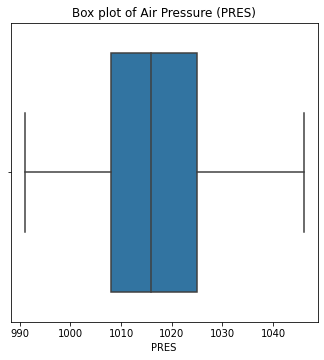

In [ ]:
# Lets plot the Pressure column with box oplot to see the central tendency
plt.figure(figsize= (5.5, 5.5))
g = sns.boxplot(df['PRES'])
g.set_title('Box plot of Air Pressure (PRES)')


Considering the IQR , an boxplot is a useful tool to quaickly identify outliers existence. By convection anything above or below the interval $] -1.5 \times IQR1, 1.5 \times IQR_3[$ are designated as outliers (depending on the task!!!). The presence of outiers can be used to decide the loss function for training the neural network. 

Lets plot Air Pressure of the entire series

/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Air Pressure readings in hPa')

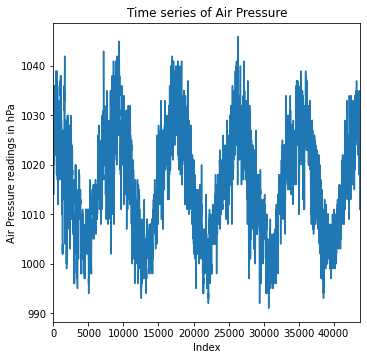

In [ ]:
# Plot the air pressure series
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['PRES'])
g.set_title('Time series of Air Pressure')
g.set_xlabel('Index')
g.set_ylabel('Air Pressure readings in hPa')


Considering the fact tha some ML algoritimns, and in particular optimizing algorithms perform better (faster convergence) if the variables are within range $[-1, 1]$, lets resclae to PRES variable within $[0, 1]$ by Minmax. To refeer this can be done since we didint notice any presence of outliers.

$$
 x^´ = \frac{x - x_{min}}{x_{max} - x_{min}}
$$



In [ ]:
# Lets minmax scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_PRES'] = scaler.fit_transform(np.array(df['PRES']).reshape(-1, 1))


Now the variable PRESS has a cokum scaled and we gonna use it for time series univariate prediction. Tio refer that the predictions we need to perform the inverse transformaiton to bring back to the oroginal scale for representation meaning.

Before training model, we split the dataframe into two parts, the train and validation set, with the network being trained in the training set. The validation is used to evaluate the model performance and determine the number of epochs of training. Increrasing the number of epochs futher decreases the training loss fnciton on the graining set, but can have reverse inpact on the validation set, in resume, overfitting. Hence, the number of epochs is controled by keeping a tap on the loos function computed for the validation set. 

Lets split the data into training and validation sets. Considering the timeframe of the dataframe, from jan 1st 2010 to Dec, 32st 2014, we keep the year 2014 for validation purposes with the remainde used to traine the model


In [ ]:
# Split data
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_train = df.loc[df['datetime']<split_date] # Find indices lower than
df_val = df.loc[df['datetime']>=split_date]

print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)


Shape of train: (35064, 15)
Shape of test: (8760, 15)


In [ ]:
# First five rows of train
df_train.head()


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_PRES
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00,0.545455
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00,0.527273
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00,0.509091
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00,0.509091
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00,0.490909


In [ ]:
# First five rows of validation
df_val.head()


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_PRES
35064,35065,2014,1,1,0,24.0,-20,7.0,1014.0,NW,143.48,0,0,2014-01-01 00:00:00,0.418182
35065,35066,2014,1,1,1,53.0,-20,7.0,1013.0,NW,147.50,0,0,2014-01-01 01:00:00,0.400000
35066,35067,2014,1,1,2,65.0,-20,6.0,1013.0,NW,151.52,0,0,2014-01-01 02:00:00,0.400000
35067,35068,2014,1,1,3,70.0,-20,6.0,1013.0,NW,153.31,0,0,2014-01-01 03:00:00,0.400000
35068,35069,2014,1,1,4,79.0,-18,3.0,1012.0,cv,0.89,0,0,2014-01-01 04:00:00,0.381818


In [ ]:
# Reset the indices of the validation set
df_val.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Scaled Air Pressure readings')

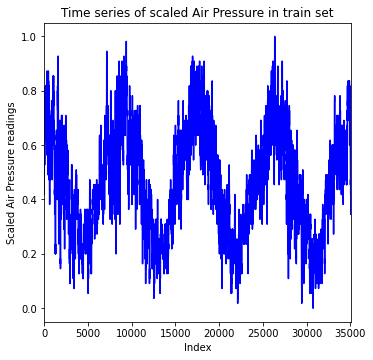

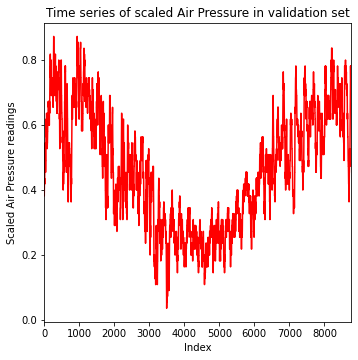

In [ ]:
# Plot the air pressure series, scaled
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_train['scaled_PRES'], color='b')
g.set_title('Time series of scaled Air Pressure in train set')
g.set_xlabel('Index')
g.set_ylabel('Scaled Air Pressure readings')


plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_val['scaled_PRES'], color='r')
g.set_title('Time series of scaled Air Pressure in validation set')
g.set_xlabel('Index')
g.set_ylabel('Scaled Air Pressure readings')



Now lets gerenrate our regressors $(X)$ and the target variable $y$ for train and validation. Lets create a 3D array of regressors and 2D array for target from the original 1D array of the scaled_PRES column in the dataframe. For this time series we use the last 7 days of observations to forecast the next day. This make to a equivalent AR(7) model. 
 

In [ ]:
# Function to return the array X and y from the time series 
def makeXy(ts, nb_timesteps):
    """
    Input: 
           ts: original time series
           nb_timesteps: number of time steps in the regressors
    Output: 
           X: 2-D array of regressors
           y: 1-D array of target 
    """
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y


In [ ]:
# Create the regressors and target for training 7 lag for training
X_train, y_train = makeXy(df_train['scaled_PRES'], 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)

X_val, y_val = makeXy(df_val['scaled_PRES'], 7)
print('Shape of validation arrays:', X_val.shape, y_val.shape)


Shape of train arrays: (35057, 7) (35057,)
Shape of validation arrays: (8753, 7) (8753,)


Now lets define a MLP using the Keras API, in a cascaded approach


In [ ]:
from keras.layers import Dense, Input, Dropout
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint


We declare the input layer with shape $(None, 7)$ being type float32. None indicates the number of instances that are deetrmined in runtime


In [ ]:
input_layer = Input(shape= (7, ), dtype= 'float32')


In [ ]:
# Dense layes are declared with linear activation
dense1 = Dense(32, activation= 'linear')(input_layer)
dense2 = Dense(16, activation= 'linear')(dense1)
dense3 = Dense(16, activation= 'linear')(dense2)


Multole hidden layers and large number of neurons in each hidden layer gives neural networks the ability to model complex non-linearity of the underluing realtions between regressors and the target variable. However, the network can overfit train data and have an bad generalization performance on validation and test set. To aleviate this, Dropout is a common technique (Ioffe) to regularize a deep neural network. On the example, a dropout layer is added before the output layer. Dropout works by randomly setting a $p$ fraction of the input neuros to be zero before passing to next layer. By randomly dropping inputs essentially acts as bootstrap aggregating or bagging type of model ensembling. Random forest uses bagging by building trees on random sunbsets of input features. We set $p=0.2$ to dropout randomly 20\% of inputs.


In [ ]:
dropout_layer = Dropout(0.2)(dense3)


In [ ]:
# Now the final output layer
output_layer = Dense(1, activation= 'linear')(dropout_layer)


The inoput, dense, and output layers are now being packed inseide model. that is a wrapper class to train and perform predictions. We use Mean Square Error (MSE) as loss function.

We optimize the network using Adam. Adam stands for adaptative moment estimation and is the most popular choice to train a deep neural network. Contrary to Stochastic gradient descent, Adam uses differnt learning rates for each weight and separately updates them during the training porcess. The learning rate of each weight is updated based on exponentially weighted moving averages of the weights gradients and the swuares gradients:


In [ ]:
ts_model = Model(inputs= input_layer, outputs= output_layer)
ts_model.compile(loss= 'mean_squared_error', optimizer= 'adam')
ts_model.summary()

# to note that the model is not istanciated and populated


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 7)]               0         
_________________________________________________________________
dense (Dense)                (None, 32)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,073
Trainable params: 1,073
Non-trainable params: 0
___________________________________________________________

Now we train the model fy invoquing the fit funciton and passing the X_train and y_train. The training process is done for a predefined number of epochs. In addition, batch_size defines the number of samples of train set to be used for a instance of backpropagation. The validation set is used to evaluate the model after every epoch is completed. A ModelCheckpoint keeps track of the loss function on the validation set and save the model for the epoch at witch the loss functon has been minimum.



In [ ]:

# Set the path to save checkpoints
save_weights_at = os.path.join(CHECK_PATH, 'PRSA_data_Air_Pressure_MLP_weights.{epoch:02d}-{val_loss:.4f}.hdf5')

# Save the best until
save_best = ModelCheckpoint(save_weights_at, 
                            monitor= 'val_loss',     # we monitor the loss values
                            verbose= 0,              # no output
                            save_best_only= True,    # save the best one until
                            save_weights_only= False, 
                            mode= 'min',             # we ant the min loss value 
                            period= 1)

# Train the model and save the best model suing the callback and path                         
history = ts_model.fit(x= X_train, y= y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Epoch 1/20
2192/2192 [==============================] - 4s 1ms/step - loss: 0.0219 - val_loss: 7.9166e-04
Epoch 2/20
2192/2192 [==============================] - 3s 1ms/step - loss: 0.0015 - val_loss: 1.9641e-04
Epoch 3/20
2192/2192 [==============================] - 3s 1ms/step - loss: 9.3514e-04 - val_loss: 1.7472e-04
Epoch 4/20
2192/2192 [==============================] - 3s 1ms/step - loss: 8.5030e-04 - val_loss: 9.8054e-04
Epoch 5/20
2192/2192 [==============================] - 3s 1ms/step - loss: 8.4340e-04 - val_loss: 3.7881e-04
Epoch 6/20
2192/2192 [==============================] - 3s 1ms/step - loss: 7.9722e-04 - val_loss: 1.7539e-04
Epoch 7/20
2192/2192 [==============================] - 3s 1ms/step - loss: 7.6686e-04 - val_loss: 1.8947e-04
Epoch 8/20
2192/2192 [==============================] - 3s 1ms/step - loss: 7.6189e-04 - val_loss: 1.9820e-04
Epoch 9/20
2192/2192 [==============================] - 3s 1ms/step - loss: 7.7167e-04 - val_loss: 1.3644e-04
Epoch 10/20
2192/2

dict_keys(['loss', 'val_loss'])


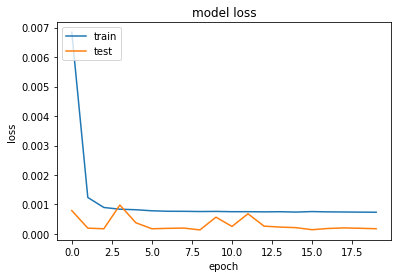

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Predictions are made from the best saved model. The models predictions, which are on the standadized air pressure, are inversely transformed to get predictions on the original air pressure. The goodness-of-fit or R-squared is also calculated


In [ ]:
best_model = load_model(os.path.join(CHECK_PATH,
                                    'PRSA_data_Air_Pressure_MLP_weights.09-0.0001.hdf5'))

# Do some precitions
preds = best_model.predict(X_val)
pred_PRES = scaler.inverse_transform(preds)
pred_PRES = np.squeeze(pred_PRES)


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(df_val['PRES'].loc[7:], pred_PRES)
print('R-squared for the validation set:', round(r2,4))

R-squared for the validation set: 0.9957


Text(0.5, 0, 'Index')

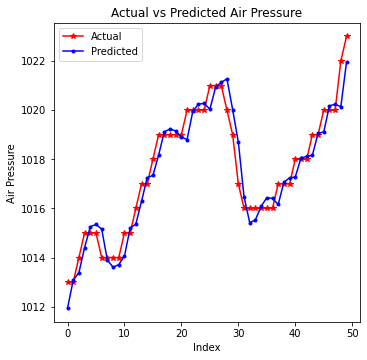

In [ ]:
#Let's plot the first 50 actual and predicted values of air pressure.
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['PRES'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_PRES[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Air Pressure')
plt.ylabel('Air Pressure')
plt.xlabel('Index')


### Lets forecast the air pressure using the pm2.5



In [ ]:

# Read the dataset into a pandas df
df = pd.read_csv(DATA_PATH + 'PRSA_data_2010.1.1-2014.12.31.csv')

print('Shape of the dataframe:', df.shape)

# Show some details
df.head(5)

Shape of the dataframe: (43824, 13)


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
"""
Rows having NaN values in column pm2.5 are dropped.
"""
df.dropna(subset=['pm2.5'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'],
                                                                                          hour=row['hour']), axis=1)
df.sort_values('datetime', ascending=True, inplace=True)

Text(0.5, 1.0, 'Box plot of pm2.5')

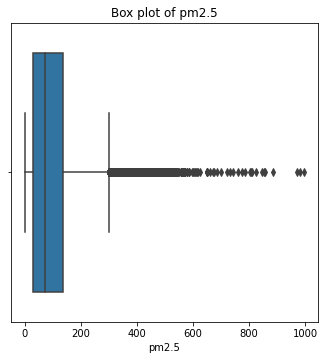

In [ ]:
# Lets plot the Pressure column with box oplot to see the central tendency and llok for outliers
plt.figure(figsize= (5.5, 5.5))
g = sns.boxplot(df['pm2.5'])
g.set_title('Box plot of pm2.5')


There is a clear evidence of presence of outliers, so the choice of MSE as loss function to train the MLP is not suitible. Since MSE correpsonds to the square of the devioations between  actual and predicted, it will give huge fluctioations to the loss function, leading to destabilization of the gradient descent algorithm, affceting its convergence. MAE being first order difference, is less susceptible to functioations due to outliers. Lets see that.

Before proecedding, lets look at the time series over a year period and for six months to look for any patterns, such a trend, seasonality or others.


/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'pm2.5 readings')

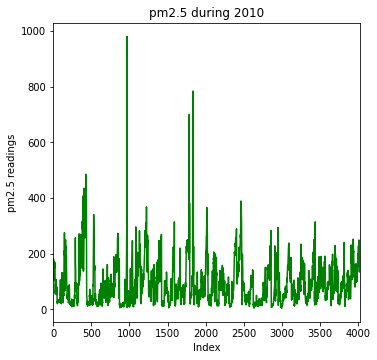

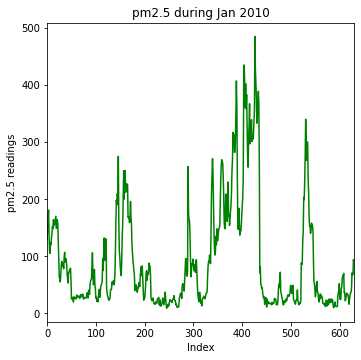

In [ ]:
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['pm2.5'].loc[df['datetime']<=datetime.datetime(year=2010,month=6,day=30)], color='g')
g.set_title('pm2.5 during 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

#Let's zoom in on one month.
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['pm2.5'].loc[df['datetime']<=datetime.datetime(year=2010,month=1,day=31)], color='g')
g.set_title('pm2.5 during Jan 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')


When we zoom in on six months of data of the pm2.5, a few patterns are apparent. The time series of pm2.5 shows periodic crests and troughs, though the time gap between two highs and two lows. The height of the crest shows considerable fluctuations. Moreover, both crests and troughs are spread over multiple timesteps. This can be identifyed by the tall peak surrounded by several smaller peaks. Similarly, there are small fluctuations in a trough as well. The time series between 2010 to 2014, does not show any long-term trend though short-term trends might be present over the series.


/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'pm2.5 readings')

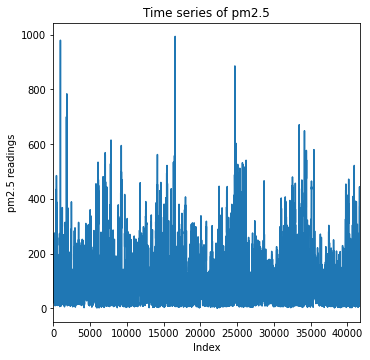

In [ ]:
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['pm2.5'])
g.set_title('Time series of pm2.5')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')


Gradient descent algorithms perform better (for example converge faster) if the variables are wihtin range -1, 1. Many sources relax the boundary to even -3, 3. The pm2.5 variable is mixmax scaled to bound the tranformed variable within 0,1.

In [ ]:
# sScale the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_pm2.5'] = scaler.fit_transform(np.array(df['pm2.5']).reshape(-1, 1))


Before training the model, the dataset is split in two parts - train set and validation set. The neural network is trained on the train set. This means computation of the loss function, back propagation and weights updated by a gradient descent algorithm is done on the train set. The validation set is used to evaluate the model and to determine the number of epochs in model training. Increasing the number of epochs will further decrease the loss function on the train set but might not neccesarily have the same effect for the validation set due to overfitting on the train set.Hence, the number of epochs is controlled by keeping a tap on the loss function computed for the validation set. We use Keras with Tensorflow backend to define and train the model. All the steps involved in model training and validation is done by calling appropriate functions of the Keras API.


In [ ]:
"""
Let's start by splitting the dataset into train and validation. The dataset's time period if from
Jan 1st, 2010 to Dec 31st, 2014. The first fours years - 2010 to 2013 is used as train and
2014 is kept for validation.
"""
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_train = df.loc[df['datetime']<split_date]
df_val = df.loc[df['datetime']>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)


Shape of train: (33096, 15)
Shape of test: (8661, 15)


In [ ]:
#Reset the indices of the validation set
df_val.reset_index(drop=True, inplace=True)


/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Scaled pm2.5 readings')

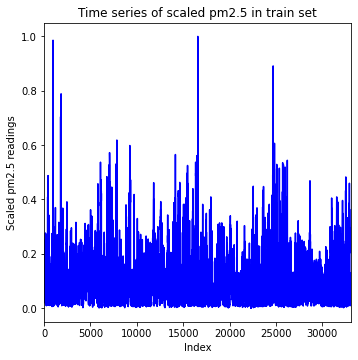

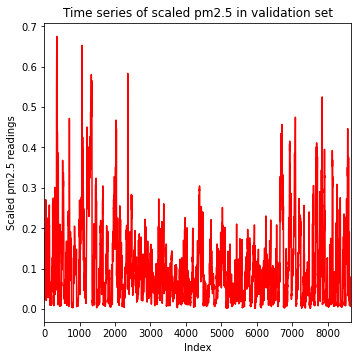

In [ ]:
"""
The train and validation time series of scaled pm2.5 is also plotted.
"""

plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_train['scaled_pm2.5'], color='b')
g.set_title('Time series of scaled pm2.5 in train set')
g.set_xlabel('Index')
g.set_ylabel('Scaled pm2.5 readings')

plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_val['scaled_pm2.5'], color='r')
g.set_title('Time series of scaled pm2.5 in validation set')
g.set_xlabel('Index')
g.set_ylabel('Scaled pm2.5 readings')


In [ ]:
def makeXy(ts, nb_timesteps):
    """
    Input: 
           ts: original time series
           nb_timesteps: number of time steps in the regressors
    Output: 
           X: 2-D array of regressors
           y: 1-D array of target 
    """
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y

In [ ]:
X_train, y_train = makeXy(df_train['scaled_pm2.5'], 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)

X_val, y_val = makeXy(df_val['scaled_pm2.5'], 7)
print('Shape of validation arrays:', X_val.shape, y_val.shape)


Shape of train arrays: (33089, 7) (33089,)
Shape of validation arrays: (8654, 7) (8654,)


A neural network withmultiple hodden layers and multiple neurons in each hidden layer would be suitible for the modeling of such complex nonlinear pattern in the data. Lets try

We gonna set a MLP for pm2.5 with three dense layers with 32, 16 and 16 hidden neuros among the first, second and third layers respectively. Each layer has a tanh activation function, and the putput a linear one. NN is trained using Adam optmizer with MAE as loss function.


In [ ]:
from keras.layers import Dense, Input, Dropout
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint


In [ ]:
input_layer = Input(shape= (7, ), dtype= 'float32')

dense1 = Dense(32, activation= 'tanh')(input_layer)
dense2 = Dense(16, activation= 'tanh')(dense1)
dense3 = Dense(16, activation= 'tanh')(dense2)


dropout_layer = Dropout(0.2)(dense3)

output_layer = Dense(1, activation= 'linear')(dropout_layer)

ts_model = Model(inputs= input_layer, outputs= output_layer)
ts_model.compile(loss= 'mean_absolute_error', optimizer= 'adam')
ts_model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 7)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                256       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 1,073
Trainable params: 1,073
Non-trainable params: 0
_________________________________________________________

In [ ]:
save_weights_at = os.path.join(CHECK_PATH, 'PRSA_data_PM2.5_MLP_weights.{epoch:02d}-{val_loss:.4f}.hdf5')

save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
history = ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)


Epoch 1/20
2069/2069 [==============================] - 3s 1ms/step - loss: 0.0215 - val_loss: 0.0120
Epoch 2/20
2069/2069 [==============================] - 3s 1ms/step - loss: 0.0165 - val_loss: 0.0120
Epoch 3/20
2069/2069 [==============================] - 3s 1ms/step - loss: 0.0161 - val_loss: 0.0119
Epoch 4/20
2069/2069 [==============================] - 3s 1ms/step - loss: 0.0163 - val_loss: 0.0138
Epoch 5/20
2069/2069 [==============================] - 3s 1ms/step - loss: 0.0164 - val_loss: 0.0123
Epoch 6/20
2069/2069 [==============================] - 3s 1ms/step - loss: 0.0162 - val_loss: 0.0122
Epoch 7/20
2069/2069 [==============================] - 3s 1ms/step - loss: 0.0160 - val_loss: 0.0126
Epoch 8/20
2069/2069 [==============================] - 3s 1ms/step - loss: 0.0159 - val_loss: 0.0156
Epoch 9/20
2069/2069 [==============================] - 3s 1ms/step - loss: 0.0161 - val_loss: 0.0129
Epoch 10/20
2069/2069 [==============================] - 3s 1ms/step - loss: 0.016

dict_keys(['loss', 'val_loss'])


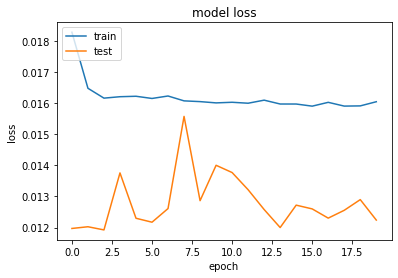

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
best_model = load_model(os.path.join(CHECK_PATH, 'PRSA_data_PM2.5_MLP_weights.03-0.0119.hdf5'))
preds = best_model.predict(X_val)
pred_pm25 = scaler.inverse_transform(preds)
pred_pm25 = np.squeeze(pred_pm25)


Text(0.5, 0, 'Index')

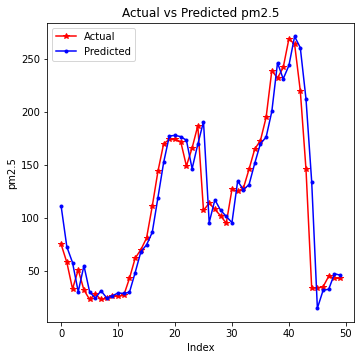

In [ ]:
from sklearn.metrics import mean_absolute_error

#Let's plot the first 50 actual and predicted values of pm2.5.
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['pm2.5'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_pm25[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted pm2.5')
plt.ylabel('pm2.5')
plt.xlabel('Index')
